In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import plotly

In [2]:
# function for loading specific invidual PLT file given file_path
def load_plt_file(file_path):

    # load file as df while skipping first six rows (unneeded header info)
    plt_df = pd.read_csv(file_path, skiprows = 6, header = None)

    # assign columns
    plt_df.columns = [
        'latitude',
        'longitude', 
        'zero_field',
        'altitude_ft',
        'date_days',
        'date_string',
        'time_string'
    ]

    return plt_df

In [7]:
# function for basic scatterplot with matplotlib
def trajectory_scatterplot(file_path, figsize = (12, 8), line_color = 'blue', point_size = 10):

    # read plt data as df
    df = load_plt_file(file_path)

    # create visualizatio
    plt.figure(figsize = figsize)
    plt.plot(df['longitude'], df['latitude'], color = line_color, linestyle = '-', linewidth = 1, alpha = 0.7)
    scatter = plt.scatter(df['longitude'], df['latitude'], c = df['altitude_ft'], cmap = 'viridis', s = point_size, alpha = 0.7)

    # customize
    plt.colorbar(scatter, label = 'Altitude (meters)')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('Geolife Trajectory Scatterplot')
    plt.grid(True, alpha = 0.3)

    plt.show()

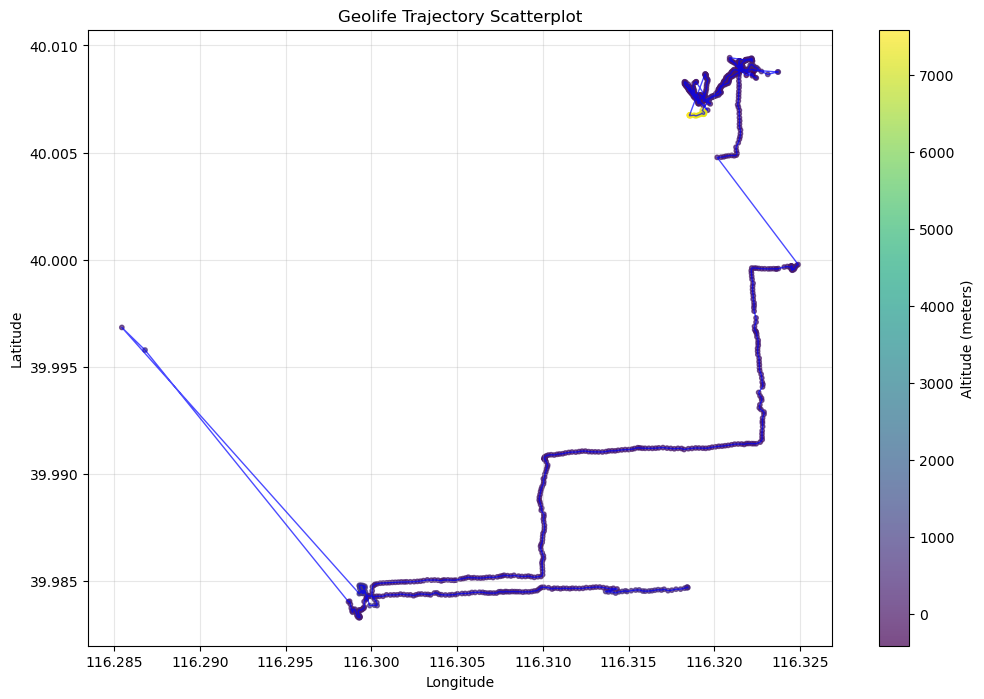

In [8]:
trajectory_scatterplot(r"../Data/GeoLife_Data/000/Trajectory/20081023025304.plt")